In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./iot-dataset/iot-train-set.csv", sep=";")
df


,timestamp,zone_id,ambient_light_lux,motion_detected,temperature_celsius,occupancy_count,day_of_week,time_of_day,weather_condition,special_event_flag,energy_price_per_kwh,prev_hour_energy_usage_kwh,traffic_density,avg_pedestrian_speed,adjusted_light_intensity,energy_consumption_kwh,lighting_action_class
0,2024-01-01 00:00:00,3,0.00,0,22.08,7,Monday,Night,Cloudy,0,3.83,3.27,26.0,4.54,54.40,1.144,0
1,2024-01-01 00:43:00,3,35.78,0,19.19,6,Monday,Night,Cloudy,0,4.61,1.50,18.9,2.42,89.75,2.069,1
2,2024-01-01 01:27:00,7,0.00,0,27.78,9,Monday,Night,Clear,0,4.21,2.51,27.6,2.85,82.25,1.687,1
3,2024-01-01 02:11:00,2,0.00,1,33.11,16,Monday,Night,Foggy,0,6.16,0.34,23.1,2.45,72.57,1.631,1
4,2024-01-01 02:55:00,4,0.00,1,27.07,11,Monday,Night,Clear,0,5.72,1.52,26.4,3.49,78.79,1.737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2024-12-30 19:37:00,12,0.00,1,28.74,14,Monday,Evening,Rainy,0,3.55,0.00,52.5,2.78,86.55,2.124,1
9596,2024-12-30 20:20:00,6,313.54,0,22.12,10,Monday,Evening,Clear,0,3.83,6.27,20.8,4.30,61.57,1.485,0
9597,2024-12-30 21:48:00,7,170.09,0,20.16,5,Monday,Night,Clear,0,3.95,2.24,20.5,1.76,89.41,1.815,1
9598,2024-12-30 23:16:00,3,375.50,1,34.16,11,Monday,Night,Clear,0,3.94,3.82,30.0,2.52,69.08,1.717,1


In [4]:
# Count number of each class
df['lighting_action_class'].value_counts()

lighting_action_class
1    5695
0    3178
2     727
Name: count, dtype: int64

In [ ]:
# Histogram group by "lighting_action_class"

class0 = df['energy_consumption_kwh'].loc[df['lighting_action_class'] == 0]

class1 = df['energy_consumption_kwh'].loc[df['lighting_action_class'] == 1]
# class1 = df.loc[df['lighting_action_class'] == 1]
# class2 = df.loc[df['lighting_action_class'] == 2]

0       1.144
5       1.695
7       1.940
9       1.050
10      0.593
        ...  
9590    0.805
9591    0.996
9592    0.568
9596    1.485
9599    1.387
Name: energy_consumption_kwh, Length: 3178, dtype: float64

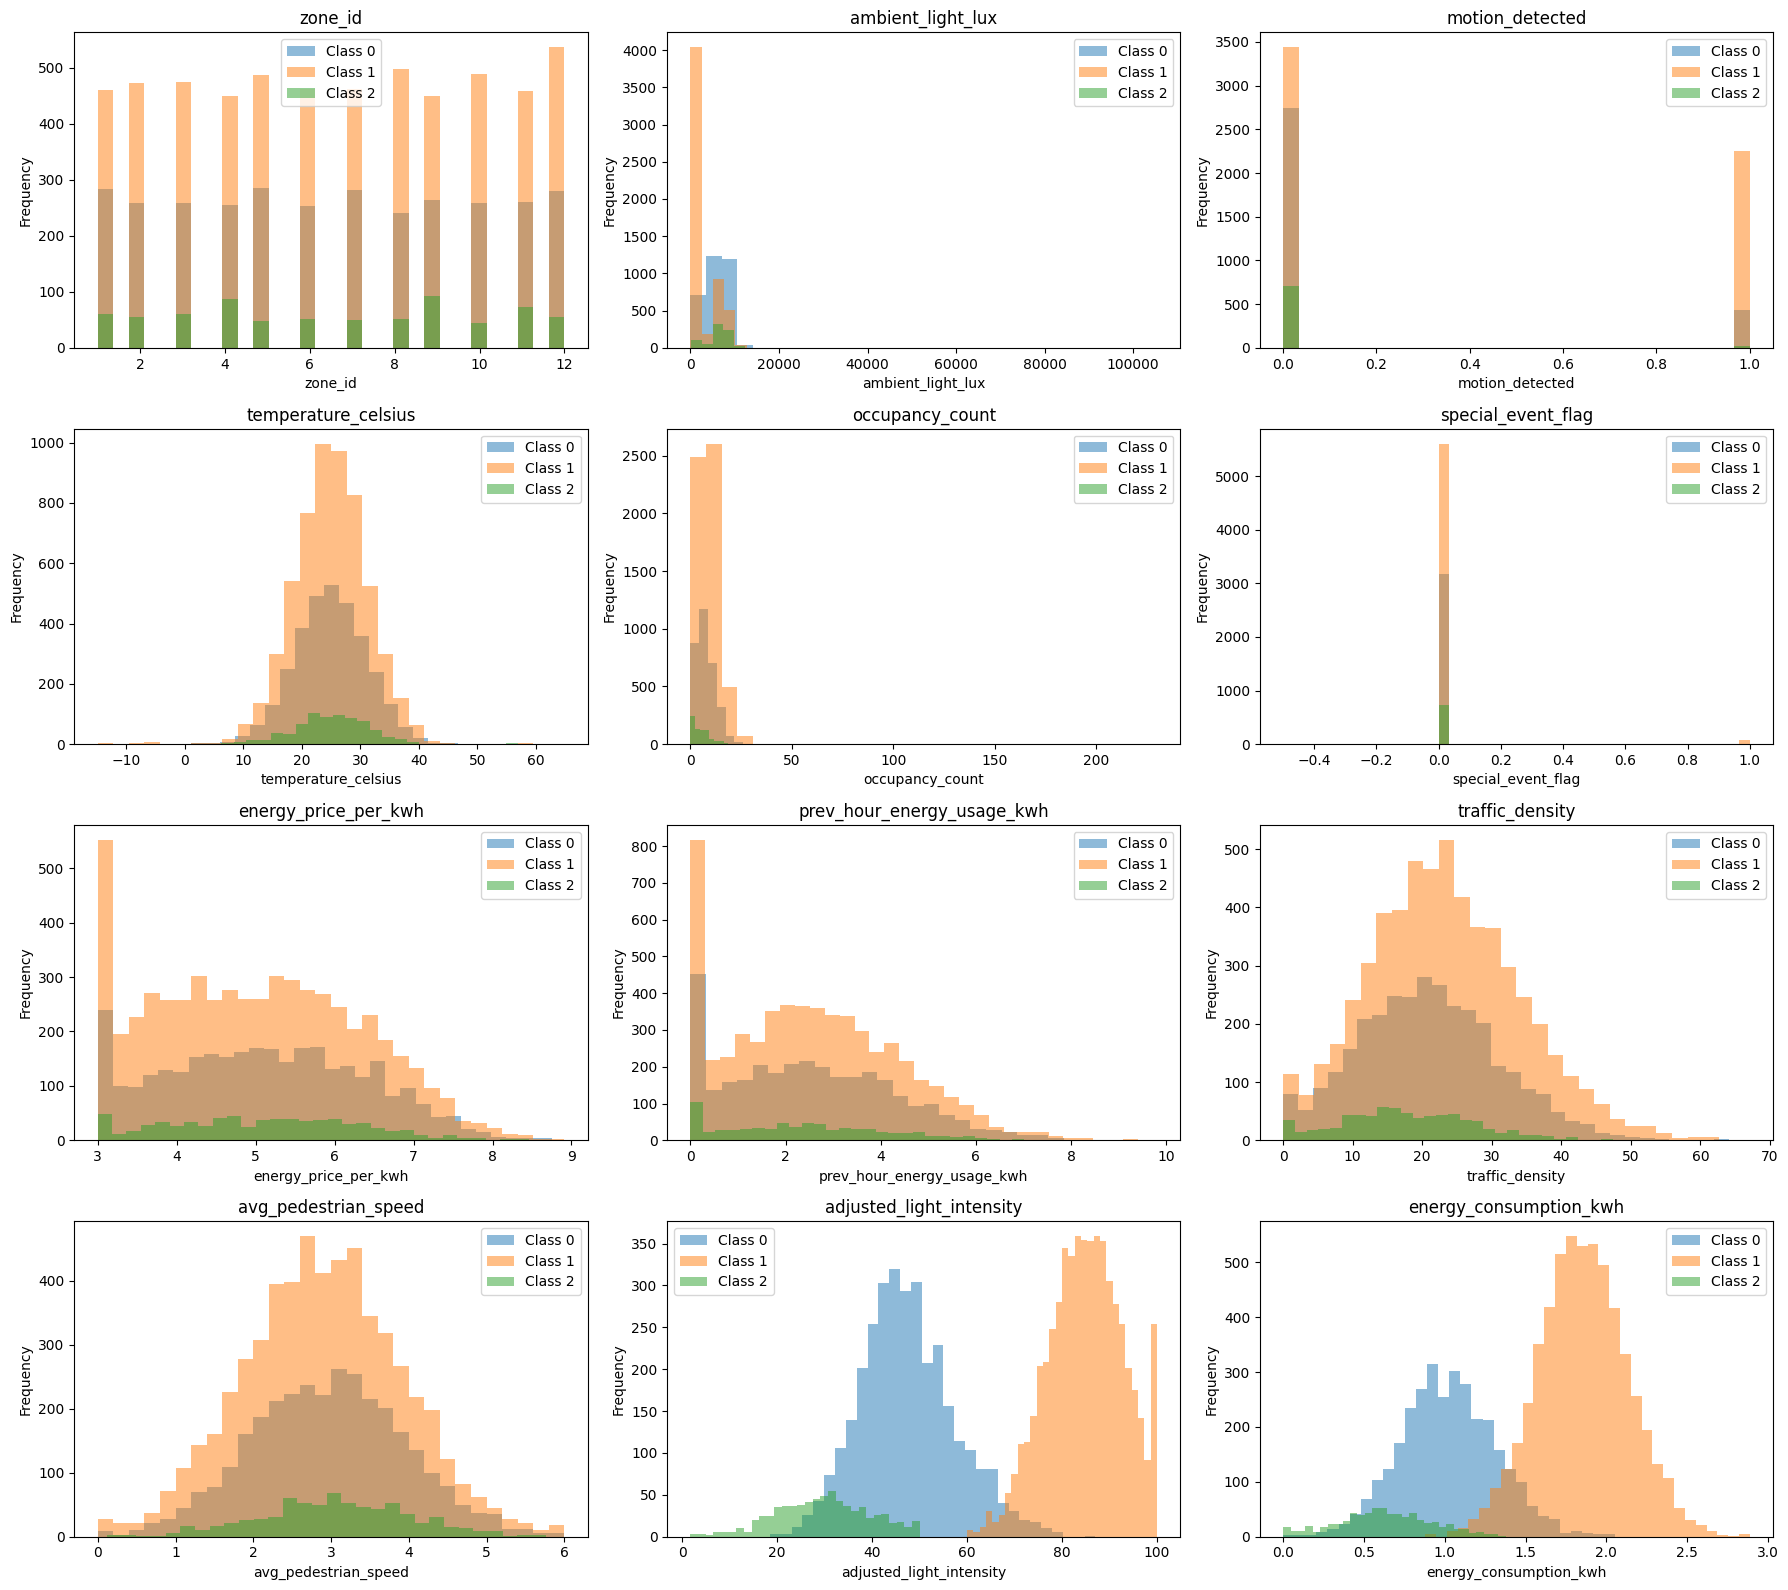

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming df is already loaded

# Exclude non-numeric columns and target column
features = df.select_dtypes(include=['number']).columns.drop("lighting_action_class")
classes = df['lighting_action_class'].unique()

# Prepare subplot grid
n_features = len(features)
n_cols = 3  # number of columns in subplot grid
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(features):
    for label in classes:
        subset = df[df['lighting_action_class'] == label]
        axes[i].hist(subset[col], bins=30, alpha=0.5, label=f'Class {label}')
    
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Assuming df is your DataFrame
categorical_cols = ["day_of_week", "time_of_day", "weather_condition"]

# One-hot encode
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

df_encoded.columns


Index(['timestamp', 'zone_id', 'ambient_light_lux', 'motion_detected',
       'temperature_celsius', 'occupancy_count', 'special_event_flag',
       'energy_price_per_kwh', 'prev_hour_energy_usage_kwh', 'traffic_density',
       'avg_pedestrian_speed', 'adjusted_light_intensity',
       'energy_consumption_kwh', 'lighting_action_class', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'time_of_day_Afternoon', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night', 'weather_condition_Clear',
       'weather_condition_Cloudy', 'weather_condition_Foggy',
       'weather_condition_Rainy'],
      dtype='object')